2E1. Which of the expressions below correspond to the statement: the probability of rain on Monday?

(1) Pr(rain)

(2) Pr(rain|Monday)

(3) Pr(Monday|rain)

(4) Pr(rain, Monday)/ Pr(Monday)

Answer: **(2) and (4)**

For (4): Pr(rain, Monday) / Pr(Monday) = ( Pr(rain|Monday)Pr(Monday) ) / Pr(Monday) = Pr(rain|Monday)

2E2. Which of the following statements corresponds to the expression: Pr(Monday|rain)?

(1) The probability of rain on Monday.

(2) The probability of rain, given that it is Monday.

(3) The probability that it is Monday, given that it is raining.

(4) The probability that it is Monday and that it is raining.

Answer: **(3)**

2E3. Which of the expressions below correspond to the statement: the probability that it is Monday,
given that it is raining?

(1) Pr(Monday|rain)

(2) Pr(rain|Monday)

(3) Pr(rain|Monday) Pr(Monday)

(4) Pr(rain|Monday) Pr(Monday)/ Pr(rain)

(5) Pr(Monday|rain) Pr(rain)/ Pr(Monday)

Answer:
**(1) and (4)**

For (4): 

Pr(rain, Monday) = Pr(Monday, rain)

Pr(rain) Pr(Monday|rain) = Pr(Monday) Pr(rain|Monday)

Pr(Monday|rain) = ( Pr(Monday) Pr(rain|Monday) ) / Pr(rain)

2E4. The Bayesian statistician Bruno de Finetti (1906–1985) began his 1973 book on probability the-
ory with the declaration: “PROBABILITY DOES NOT EXIST.” The capitals appeared in the original,
so I imagine de Finetti wanted us to shout this statement. What he meant is that probability is a de-
vice for describing uncertainty from the perspective of an observer with limited knowledge; it has no
objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What
does it mean to say “the probability of water is 0.7”?

2M1. Recall the globe tossing model from the chapter. Compute and plot the grid approximate
posterior distribution for each of the following sets of observations. In each case, assume a uniform
prior for p.

(1) W, W, W

(2) W, W, W, L

(3) L, W, W, L, W, W, W

In [1]:
# imports
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import numpy as np

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


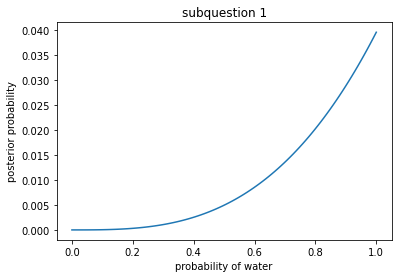

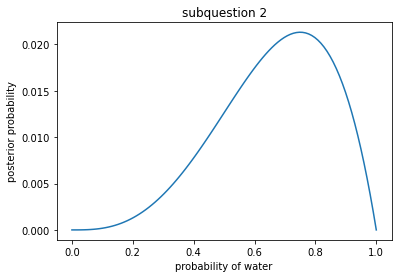

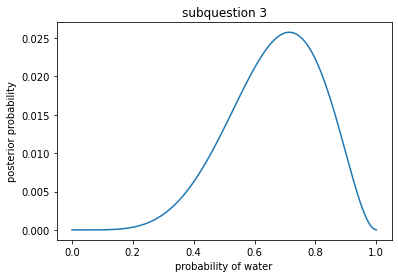

In [2]:
grid_size = tf.constant(100)
p_grid = tf.linspace(start=0., stop=1., num=grid_size)
p_grid = tf.expand_dims(p_grid, 1)

# define prior
prior = tf.ones([grid_size, 1])
prior_prob = prior / tf.math.reduce_sum(prior)

q_1 = tf.constant([1,1,1])
q_2 = tf.constant([1,1,1,0])
q_3 = tf.constant([0,1,1,0,1,1,1])

binomials = tfd.Binomial([3, 4, 7], probs=p_grid)

likelihoods = binomials.prob([tf.math.reduce_sum(q_1), 
                            tf.math.reduce_sum(q_2), 
                            tf.math.reduce_sum(q_3)])

marginal_likelihoods = tf.math.reduce_sum(likelihoods * prior_prob, axis=0)

posterior = likelihoods * prior_prob / marginal_likelihoods

for i in range(3):
    _, ax = plt.subplots()
    ax.plot(p_grid, posterior[:,i])
    ax.set_xlabel('probability of water')
    ax.set_ylabel('posterior probability')
    ax.set_title('subquestion {}'.format(i+1))

2M2. Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when
p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of
observations in the problem just above.

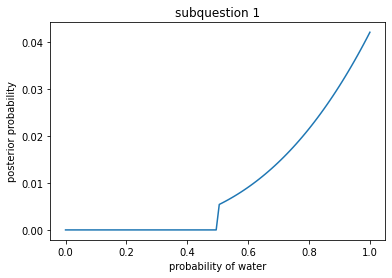

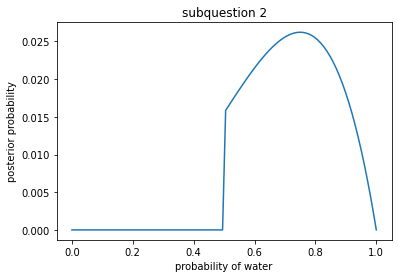

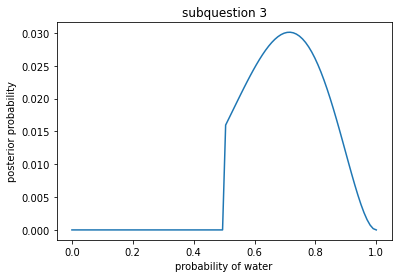

In [3]:
grid_size = tf.constant(100)
p_grid = tf.linspace(start=0., stop=1., num=grid_size)
p_grid = tf.expand_dims(p_grid, 1)

prior = tf.constant(np.expand_dims(np.array([0 if i < 0.5 else 1 for i in p_grid], dtype=np.float32), 1))
prior_prob = prior / tf.math.reduce_sum(prior)

q_1 = tf.constant([1,1,1])
q_2 = tf.constant([1,1,1,0])
q_3 = tf.constant([0,1,1,0,1,1,1])

binomials = tfd.Binomial([3, 4, 7], probs=p_grid)

likelihoods = binomials.prob([tf.math.reduce_sum(q_1), 
                            tf.math.reduce_sum(q_2), 
                            tf.math.reduce_sum(q_3)])

marginal_likelihoods = tf.math.reduce_sum(likelihoods * prior_prob, axis=0)

posterior = likelihoods * prior_prob / marginal_likelihoods

for i in range(3):
    _, ax = plt.subplots()
    ax.plot(p_grid, posterior[:,i])
    ax.set_xlabel('probability of water')
    ax.set_ylabel('posterior probability')
    ax.set_title('subquestion {}'.format(i+1))

2M3. Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered
in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know
which—was tossed in the air and produced a “land” observation. Assume that each globe was equally
likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on
seeing “land” (Pr(Earth|land)), is 0.23.

In [4]:
# We want to find Pr(Earth|land) = Pr(land|Earth)Pr(Earth) / Pr(land)

# prior = Pr(Earth)
# likelihood = Pr(land|Earth) (probability of land given that we have tossed the Earth globe)
# marginal_likelihood = Pr(land) (average probability of getting land)

prior = 0.5
likelihood = 0.3
marginal_likelihood = 0.3 * 0.5 + 1 * 0.5

posterior = prior * likelihood / marginal_likelihood
print(posterior)

0.23076923076923075


2M4. Suppose you have a deck with only three cards. Each card has two sides, and each side is either
black or white. One card has two black sides. The second card has one black and one white side. The
third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone
reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up,
but you don’t know the color of the side facing down. Show that the probability that the other side is
also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This
means counting up the ways that each card could produce the observed data (a black side facing up
on the table).

In [5]:
# 3 cards
# c1: BB
# c2: BW
# c3: WW

# ways c1 can produce black side: 2
# ways c2 can produce black side: 1
# ways c3 can produce black side: 0

# 2/3 chance a card with black side facing up is c1 -> 100% chance other side is black
# 1/3 chance a card with black side facing up is c2 -> 0% chance other side is black

# thus 2/3 * 1 + 1/3 * 0 = 2/3 chance the other side is black

2M5. Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is
drawn from the bag and a black side appears face up. Again calculate the probability that the other
side is black.

In [6]:
# 4 cards
# c1: BB
# c2: BW
# c3: WW
# c4: BB

# ways c1 can produce black side: 2
# ways c2 can produce black side: 1
# ways c3 can produce black side: 0
# ways c4 can produce black side: 2

# 2/5 chance a card with black side facing up is c1 -> 100% chance other side is black
# 1/5 chance a card with black side facing up is c2 -> 0% chance other side is black
# 2/5 chance a card with black side facing up is c4 -> 100% chance other side is black

# thus 2/5 * 1 + 1/5 * 0 + 2/5 * 1 = 4/5 chance the other side is black

2M6. Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white
sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume
there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that
for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to
pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that
the probability the other side is black is now 0.5. Use the counting method, as before.

In [7]:
# 3 cards
# c1: BB
# c2: BW
# c3: WW

# ways c1 can produce black side: 2
# ways c2 can produce black side: 1
# ways c3 can produce black side: 0

# weighting of c1: 1
# weighting of c2: 2
# weighting of c3: 3

# weighted ways c1 = 2 * 1 = 2
# weighted ways c2 = 1 * 2 = 2
# weighted ways c3 = 0 * 3 = 0

# 2/4 chance a card with black side facing up is c1 -> 100% chance other side is black
# 2/4 chance a card with black side facing up is c2 -> 0% chance other side is black

# thus 1/2 chance the card is c1 and the other side is black

2M7. Assume again the original card problem, with a single card showing a black side face up. Before
looking at the other side, we draw another card from the bag and lay it face up on the table. The face
that is shown on the new card is white. Show that the probability that the first card, the one showing
a black side, has black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat
this like the sequence of globe tosses, counting all the ways to see each observation, for each possible
first card.

In [8]:
# 3 cards
# c1: BB
# c2: BW
# c3: WW

# ways c1 can produce black side: 2
# ways c2 can produce black side: 1
# ways c3 can produce black side: 0

# ways c1 can produce white side: 0
# ways c2 can produce white side: 1
# ways c3 can produce white side: 2

# sequence (without replacement) is B, W

# using counting

# ways that we can get B, W if c1 is first = 2 * 3 = 6
# ways we can get B, W if c1 is not first (c2 must be first) = 1 * 2 = 2
# prob of c1 first = c1_ways / total_ways = 6 / (6 + 2) = 0.75

# another method using probabilities

# prob of c1 first given B = 2/3; if c1 is first, prob that next side is W is 3/4
# prob of c2 first given B = 1/3; if c2 is first, prob that next side is W is 1/2

# we have missing probabilities because we haven't considered other sequences (so we need to normalise)
# 2/3 * 3/4 = 6/12 = 3/6 (c1 first)
# 1/3 * 1/2 = 1/6 (c2 first)
# normalise (multiply by 6/4 so probabilities sum to 1)

# prob that c1 first is 3/6 * 6/4 = 3/4 = 0.75

2H1. Suppose there are two species of panda bear. Both are equally common in the wild and live
in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay
capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins
10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise
birthing singleton infants. Assume these numbers are known with certainty, from many years of field
research.

Now suppose you are managing a captive panda breeding program. You have a new female panda
of unknown species, and she has just given birth to twins. What is the probability that her next birth
will also be twins?

In [9]:
# we can't determine what species the new female panda is but we can determine the probability that she is species A 
# and the probability that she is species B. From this, we can predict the odds that her next birth will be twins.

# from the question, we can assume that the prior for species A and B is 0.5

# let the posterior be Pr(panda is species A | twins)
# the prior is then Pr(species A) = 0.5
# the likelihood is Pr(twins | species A) = 0.1
# the marginal likelihood is Pr(twins) = 0.5 * 0.1 + 0.5 * 0.2 = 0.15

# Pr(panda is species A | twins) = 0.5 * 0.1 / 0.15 = 1/3
# thus the probability that the panda is species B is 2/3

pr_next_birth_twins = 1/3 * 0.1 + 2/3 * 0.2
print(pr_next_birth_twins)

0.16666666666666666


2H2. Recall all the facts from the problem above. Now compute the probability that the panda we
have is from species A, assuming we have observed only the first birth and that it was twins.

In [10]:
# from above: 1/3

2H3. Continuing on from the previous problem, suppose the same panda mother has a second birth
and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is
species A.

In [11]:
prior = 1/3
# likelihood is Pr(singleton | species A)
likelihood = 0.9
# marginal_likelihood is Pr(singleton)
marginal_likelihood = 1/3 * 0.9 + 2/3 * 0.8
posterior = prior * likelihood / marginal_likelihood
print(posterior)

0.36000000000000004


2H4. A common boast of Bayesian statisticians is that Bayesian inference makes it easy to use all of
the data, even if the data are of different types.
So suppose now that a veterinarian comes along who has a new genetic test that she claims can
identify the species of our mother panda. But the test, like all tests, is imperfect. This is the information you have about the test:

- The probability it correctly identifies a species A panda is 0.8.
- The probability it correctly identifies a species B panda is 0.65.

The vet administers the test to your panda and tells you that the test is positive for species A. First
ignore your previous information from the births and compute the posterior probability that your
panda is species A. Then redo your calculation, now using the birth data as well.

In [12]:
# ignoring birth data

# posterior is Pr(A|posA)
# prior is Pr(A)
# likelihood is Pr(posA|A)
# marginal_likelihood is Pr(posA)

prior = 0.5 # ignoring births
likelihood = 0.8 # true positive for A
# 1-0.65=0.35 is the false negative probability for B (i.e. panda is B but the test for B is negative, giving a false positive test for A)
marginal_likelihood = 0.5 * 0.8 + 0.5 * 0.35 
posterior = prior * likelihood / marginal_likelihood
print(posterior)

0.6956521739130436


In [13]:
# including birth data: twins then singleton

# posterior--what we are trying to figure out--is Pr(panda is species A | twins, singleton)
# prior is 6956521739130436 from above
# the likelihood is Pr(twins, singleton | species A) 
# the marginal likelihood is Pr(twins, singleton)

prior = 0.6956521739130436
likelihood = tfd.Binomial(2, probs=0.1).prob(1)
marginal_likelihood = prior * tfd.Binomial(2, probs=0.1).prob(1) + (1-prior) * tfd.Binomial(2, probs=0.2).prob(1)
posterior = prior * likelihood / marginal_likelihood
print(posterior.numpy())

0.56250006


In [14]:
# we can also do it the other way around, if we take the posterior for births and use it as a prior for the genetic test
# posterior--what we are trying to figure out--is Pr(panda is species A | positive test)
# prior is 0.36 (from 2H3)
# the likelihood is Pr(positive test | species A) 
# the marginal likelihood is Pr(positive test)

prior = 0.36 # accounting for births
likelihood = 0.8 # true positive for A
marginal_likelihood = prior * 0.8 + (1 - prior) * 0.35
posterior = prior * likelihood / marginal_likelihood
print(posterior)

0.5625
